In [1]:
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import pandas as pd
import random
import keras

Using TensorFlow backend.


In [2]:
with open('result/outer_cv.pkl', 'rb') as f:
    results = pickle.load(f)
with open('result/args.pkl', 'rb') as f:
    args = pickle.load(f)

In [3]:
def style_maximizing_table(df):
    g_pallete = seaborn.light_palette("green", as_cmap=True, reverse=True)
    return df.style.background_gradient(cmap=g_pallete)

In [4]:
scores = [r['score_values'] for r in results]
print(scores)
maes = [s['mean_absolute_error'] for s in scores]
result_df = pd.DataFrame.from_dict({
    "mean_absolute_error" : maes
})
style_maximizing_table(result_df)

[{'mean_absolute_error': 0.21690909457971475}]


,mean_absolute_error
0,0.216909


In [5]:
data = h5py.File(args.path, 'r')

In [6]:
result_idx = 0
result = results[result_idx]
test_idx = sorted(random.sample(result['test_idx'].tolist(), 20))

X_test = data['X'][test_idx]
y_test = data['y'][test_idx]

model = keras.models.load_model('result/model%d.h5' % result_idx)
model.summary()

predicted_values = model.predict(X_test).squeeze().tolist()
true_values = y_test
result_df = pd.DataFrame.from_dict({
    "true" : true_values,
    "predicted" : predicted_values,
    "diff" : np.abs(np.array(predicted_values)-np.array(true_values))
})
style_maximizing_table(result_df)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               130100    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
output (Dense)               (None, 1)                 51        
Total params: 135,201
Trainable params: 135,201
Non-trainable params: 0
_________________________________________________________________


,true,predicted,diff
0,0.3,0.197449,0.102551
1,0.3,0.308659,0.00865875
2,0.5,0.841292,0.341292
3,0.6,0.51735,0.0826503
4,0.7,0.571215,0.128785
5,0.7,0.664969,0.0350309
6,0.8,0.832849,0.0328487
7,0.8,0.815983,0.0159831
8,0.9,0.847128,0.052872
9,0.9,0.744439,0.155561


min val_loss: 0.214533
min loss: 0.209519


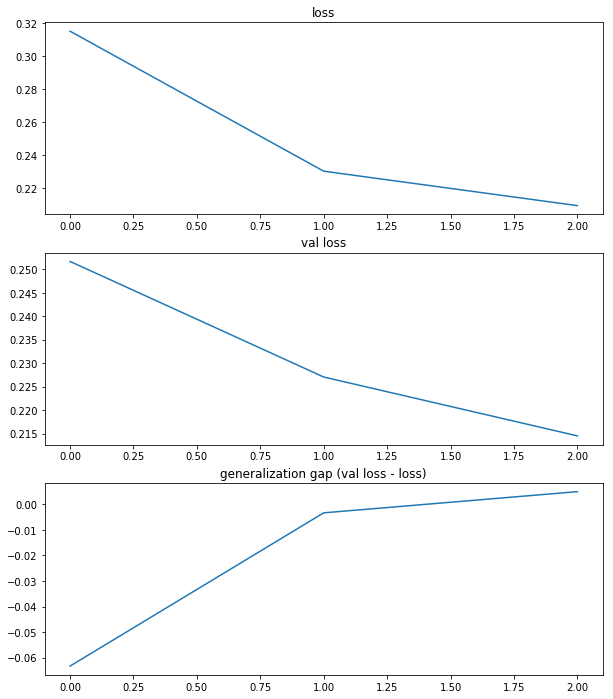

In [7]:
# Plot history.
with open('result/history%d.pkl' % result_idx, 'rb') as f:
    history = pickle.load(f).history

val_loss = history['val_loss']
loss = history['loss']
print("min val_loss: %f" % min(val_loss))
print("min loss: %f" % min(loss))
gen_gap = np.array(val_loss)-np.array(loss)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(10, 12)
ax1.set_title("loss")
ax1.plot(loss)
ax2.set_title("val loss")
ax2.plot(val_loss)
ax3.set_title("generalization gap (val loss - loss)")
ax3.plot(gen_gap)